In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
# df = pd.read_csv("WeatherDataTest.csv")


In [4]:
df = pd.read_csv("ProcessedWeatherData_v5.csv")
df_test=pd.read_csv("ProcessedWeatherDataTest_v5.csv")

In [5]:
df.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,M3,1011.4,270.0,18.0,25.0,2.000000,5.000000,16.2,13.9,16.1,86.0
1,M6,1023.3,190.0,11.0,14.0,0.900000,6.000000,13.9,11.0,14.9,83.0
2,M4,1033.2,200.0,19.0,23.0,2.032198,5.593645,7.7,4.0,10.2,77.0
3,M6,1012.5,300.0,13.0,20.0,2.700000,7.000000,14.7,14.0,15.6,96.0
4,M6,1011.0,190.0,13.0,18.0,2.000000,6.000000,13.6,10.7,13.9,83.0


In [6]:
df_test.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,M6,1019.6,250.0,17.331821,25.190067,3.400000,7.000000,9.8,6.2,10.80000,78.0
1,M6,1001.3,320.0,25.000000,35.000000,4.800000,8.000000,9.8,6.2,10.50000,78.0
2,M6,1019.2,150.0,19.127747,26.843626,2.500000,5.000000,13.1,9.9,14.30000,81.0
3,M2,1024.0,10.0,16.000000,21.000000,1.200000,5.000000,7.5,3.6,9.70635,76.0
4,M4,1005.6,290.0,19.000000,25.000000,3.637322,7.310309,7.8,0.5,9.70000,60.0


In [7]:
df = df.drop(["station_id"], axis = 1)
df_test = df_test.drop(["station_id"], axis = 1)

In [8]:
df = df.drop(["WaveHeight","WavePeriod"], axis = 1)
df_test = df_test.drop(["WaveHeight","WavePeriod"], axis = 1)

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X.isnull().sum()

AtmosphericPressure    0
WindDirection          0
WindSpeed              0
Gust                   0
AirTemperature         0
DewPoint               0
SeaTemperature         0
dtype: int64

In [11]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# Forward Selection

In [12]:
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [13]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=7,
                          scoring='r2')

In [14]:
sfs.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Backward selection

In [15]:
sfsb = SFS(LinearRegression(),
          k_features=7,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [16]:
sfsb.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=7, scoring='r2')

In [17]:
sfsb.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Plot

In [18]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


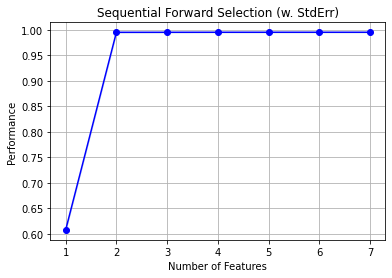

In [19]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [20]:
sfs2 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=False,
         floating=False,
         cv=0)
sfs2.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


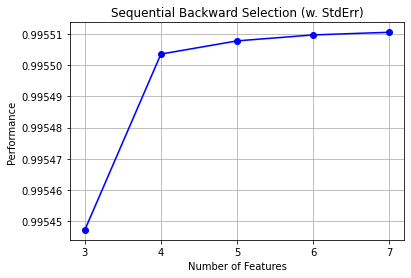

In [21]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [22]:
X_train = X
y_train = y

In [23]:
for cols in X_test.columns:
    X_test[cols] = pd.to_numeric(X_test[cols])

for cols in X_train.columns:
    X_train[cols] = pd.to_numeric(X_train[cols])

<ipython-input-23-a1e7eff26117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = pd.to_numeric(X_test[cols])
<ipython-input-23-a1e7eff26117>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pd.to_numeric(X_train[cols])


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87983 entries, 0 to 87982
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AtmosphericPressure  87983 non-null  float64
 1   WindDirection        87983 non-null  float64
 2   WindSpeed            87983 non-null  float64
 3   Gust                 87983 non-null  float64
 4   AirTemperature       87983 non-null  float64
 5   DewPoint             87983 non-null  float64
 6   SeaTemperature       87983 non-null  float64
dtypes: float64(7)
memory usage: 4.7 MB


In [25]:
X_train.corr()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature
AtmosphericPressure,1.000000,-0.076168,-0.388719,-0.420284,0.018300,-0.020685,-0.013369
WindDirection,-0.076168,1.000000,0.117028,0.139023,0.099881,0.036790,0.137088
WindSpeed,-0.388719,0.117028,1.000000,0.957870,-0.031589,0.013113,-0.082022
Gust,-0.420284,0.139023,0.957870,1.000000,-0.089816,-0.047670,-0.106682
AirTemperature,0.018300,0.099881,-0.031589,-0.089816,1.000000,0.900933,0.867535
DewPoint,-0.020685,0.036790,0.013113,-0.047670,0.900933,1.000000,0.695651
SeaTemperature,-0.013369,0.137088,-0.082022,-0.106682,0.867535,0.695651,1.000000


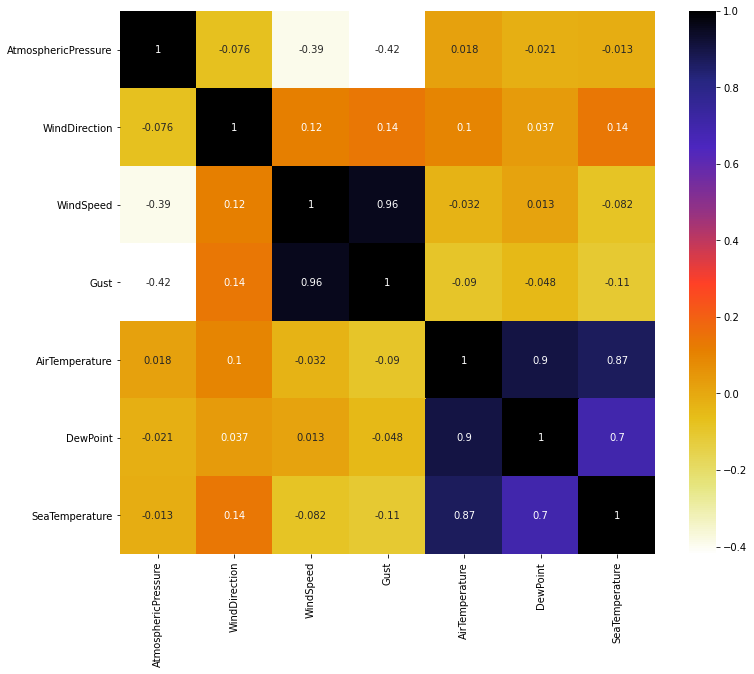

In [26]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(X_train, 0.8)
# len(set(corr_features))

In [29]:
corr_features

{'DewPoint', 'Gust', 'SeaTemperature'}

In [30]:
X_train.head()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature
0,1011.4,270.0,18.0,25.0,16.2,13.9,16.1
1,1023.3,190.0,11.0,14.0,13.9,11.0,14.9
2,1033.2,200.0,19.0,23.0,7.7,4.0,10.2
3,1012.5,300.0,13.0,20.0,14.7,14.0,15.6
4,1011.0,190.0,13.0,18.0,13.6,10.7,13.9


In [31]:
# X_train = X_train.drop(corr_features, axis = 1)
# X_test = X_test.drop(corr_features, axis = 1)
X_train = X_train.drop(["Gust","DewPoint","SeaTemperature"], axis=1)
X_test = X_test.drop(["Gust","DewPoint","SeaTemperature"], axis=1)

# Linear Regression

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
mse = cross_val_score(linear_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_nse = np.mean(mse)
print(mse)
print(mean_nse)
linear_regressor.fit(X_train, y_train)

[-87.98632924 -87.00110782 -88.22977307 -88.44829664 -87.4019319 ]
-87.81348773283177


LinearRegression()

In [33]:
prediction_linear = linear_regressor.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R2 score: ', r2_score(y_test, prediction_linear))
print('MSE: ',  mean_squared_error(y_test, prediction_linear))
print('Mean absolute error: ', mean_absolute_error(y_test, prediction_linear))

R2 score:  0.2087773791647971
MSE:  87.96723058104713
Mean absolute error:  7.737605973283986


# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-87.81348750646188


In [39]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
prediction_ridge = ridge.predict(X_test)

In [52]:
print('MSE for ridge regression: ',  mean_squared_error(y_test, prediction_ridge))
print('Mean absolute error for ridge regression: ', mean_absolute_error(y_test, prediction_ridge))
print('R2 score for ridge regression: ', r2_score(y_test, prediction_ridge))

MSE for ridge regression:  87.96723054336933
Mean absolute error for ridge regression:  7.737605994254991
R2 score for ridge regression:  0.2087773795036908


# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-87.81348773391417


In [42]:
prediction_lasso = lasso_regressor.predict(X_test)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
print('MSE for lasso: ',  mean_squared_error(y_test, prediction_lasso))
print('Mean_absolute_error: ', mean_absolute_error(y_test, prediction_lasso))
print('R2 score for lasso: ', r2_score(y_test, prediction_lasso))

R2 score for lasso:  0.20877737861851875
MSE for lasso:  87.96723064178174
Mean_absolute_error:  7.73760742631807


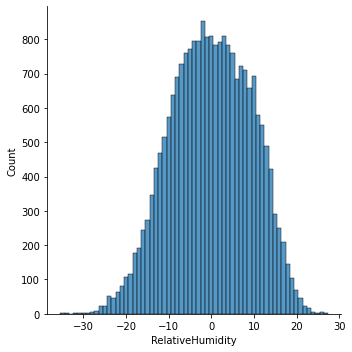

In [44]:
import seaborn as sns
sns.displot(y_test-prediction_lasso)

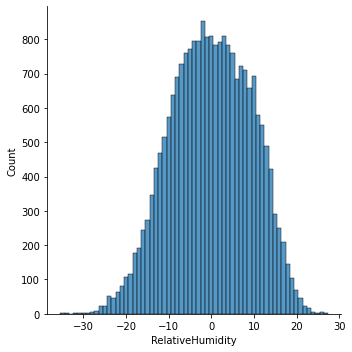

In [45]:
sns.displot(y_test-prediction_ridge)

In [46]:
X.shape

(87983, 7)

# Cross Validation Plots

In [47]:
from sklearn.model_selection import KFold
mean_error=[]
std_error=[]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for c in C_range:
    model = Lasso(alpha = 1/(2*c))
    temp=[]
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        y_predict = model.predict(X.iloc[test])
        temp.append(mean_squared_error(y.iloc[test],y_predict))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

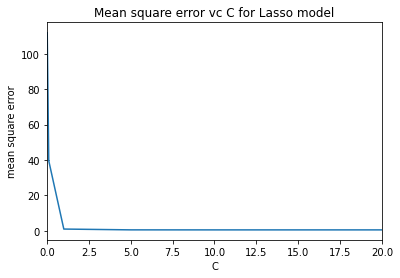

In [48]:
plt.errorbar(C_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('mean square error')
plt.title('Mean square error vc C for Lasso model')
plt.xlim(0,20)
plt.show()

In [49]:
from sklearn.model_selection import KFold
mean_error1=[]
std_error1=[]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for c in C_range:
    model = Ridge(alpha = 1/(2*c))
    temp=[]
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        y_predict = model.predict(X.iloc[test])
        temp.append(mean_squared_error(y.iloc[test],y_predict))
    mean_error1.append(np.array(temp).mean())
    std_error1.append(np.array(temp).std())

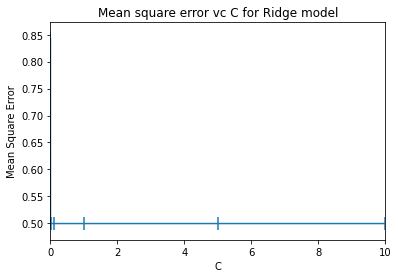

In [50]:
plt.errorbar(C_range, mean_error1, yerr=std_error1)
plt.xlabel('C')
plt.ylabel('Mean Square Error')
plt.title('Mean square error vc C for Ridge model')
plt.xlim(0,10)
# plt.ylim(0,1)
plt.show()

In [51]:
X_train.head()

,AtmosphericPressure,WindDirection,WindSpeed,AirTemperature
0,1011.4,270.0,18.0,16.2
1,1023.3,190.0,11.0,13.9
2,1033.2,200.0,19.0,7.7
3,1012.5,300.0,13.0,14.7
4,1011.0,190.0,13.0,13.6


# Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
prediction_elastic = results.predict(X_test)
# print(prediction_elastic)

In [ ]:
print('R2 score for lasso: ', r2_score(y_test, prediction_elastic))
print('RMSE for lasso: ',  np.sqrt(mean_squared_error(y_test, prediction_elastic)))
print('Mean_absolute_error: ', mean_absolute_error(y_test, prediction_elastic))